# ML210-Assignment 6: Resampling Methods

Dataset needed:
UCI Airfoil Self-Noise Data Set  (https://archive.ics.uci.edu/ml/datasets/diabetes)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('diabetes.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Make an 80/20 train/test split.

In [8]:
#TODO
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)
y = data[['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### Fit a logistic regression model on the training data.

In [9]:
from sklearn import linear_model

#TODO
log_rgr = linear_model.LogisticRegression() # Initialize logistic regression classifier
model = log_rgr.fit(X, y.values.ravel())#  fit data

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Predict the test data.

In [10]:
y_pred = log_rgr.predict(X_test)


#### Plot the ROC curve and compute the AUC score

AUC: 0.7313131313131312


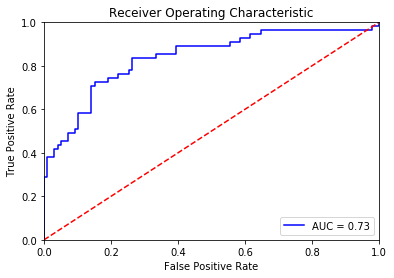

In [11]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold =  metrics.roc_curve(y_test, preds) #TODO
roc_auc = roc_auc_score(y_test, log_rgr.predict(X_test)) #TODO


print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Calculate the accuracy metric of the observations in the test set.

In [14]:
#TODO

lr_acc = log_rgr.score(X_test, y_test)
print("Accuracy: {}".format(lr_acc))

Accuracy: 0.7792207792207793


## Cross-Validation

## *k-*Fold Cross-Validation

In few sentences, explain how K-fold procedure work.

Perform linear regression using *k-*fold cross validation, try different values of k and print out the mean accuracy obtained.

In [ ]:
# Question: In few sentences, explain how K-fold procedure work.
#[payal]: In k-fold cross-validation, the training data is randonly divided into k equal size datasets. 
#         Out of the k smaller datasets,one dataset is used for validation and other k-1 data sets are used for training. 
#         This process is then repeated k times and the results are averaged to produce single estimate 


#from sklearn.cross_validation import cross_val_score # throws error: No module named sklearn.cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1)

scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv=10)
print('Scores with k=10 is ',scores.mean())

scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv=20)
print('Scores with k=20 is ',scores.mean())

scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv=30)
print('Scores with k=30 is ',scores.mean())

scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv=50)
print('Scores with k=50 is ',scores.mean())

scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv=100)
print('Scores with k=100 is ',scores.mean())

Scores with k=10 is  0.7400130879824972
Scores with k=20 is  0.7402149781113196


## The Bootstrap

Print the target class distribution (You can see that there's almost twice as much 0s than 1s)


In [15]:
#TODO
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Let's perform bootstrapping to up-sample the minority class

1. First, we'll import the resampling module from Scikit-Learn
2. Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class
3. Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [16]:
from sklearn.utils import resample

 
# Separate majority and minority classes
majority_class = data[data.Outcome==0]#TODO
minority_class = data[data.Outcome==1]#TODO
 
# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True, #TODO,     # sample with replacement
                                 n_samples=500, #TODO,   # to match majority class
                                 random_state=42)   # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])
 
# Display new class counts 
data_upsampled.Outcome.value_counts()
#TODO: the new DataFrame should now have more observations than the original, and the ratio of the two classes is now 1:1

1    500
0    500
Name: Outcome, dtype: int64

Let's train another model using Logistic Regression, this time on the balanced dataset

In [18]:
# Separate input features (X) and target variable (y)
X = data_upsampled.drop('Outcome', axis=1)
y = data_upsampled[['Outcome']]

#Perform train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Train model
from sklearn import linear_model

log_rgr = linear_model.LogisticRegression() # Initialize logistic regression classifier
model = log_rgr.fit(X, y.values.ravel())#  fit data
 
# Predict on training set
y_pred = log_rgr.predict(X_test)

# How's our accuracy? Has it improved? Comment
lr_acc = log_rgr.score(X_test, y_test)
print("Accuracy: {}".format(lr_acc))
# Accuracy has decreased from 77.92% to 71.5% because it is now predicting both classes. 
# Even though the accuracy has decreased, it is more meaningful as it will predict both classes now

Accuracy: 0.715


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# what was your incoming experience with this model, if any?
# [payal]: both k-fold cross-validation and bootstrap were new to me
# what steps you took, what obstacles you encountered.
# [payal]: they are all well documented so was able to refer to API documentation and get this working
# how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
# [payal]: Real world data is not balanced jus like this exercise so its good learning. I also think in real world we would need more sophisticated ways to produce synthetic data using domain expertise